In [1]:
import pandas as pd

# Juli 2020

In [ ]:
for i in range(1,32):
  df = pd.read_excel('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta per Kota/Standar Kelurahan Data Corona ('+ str(i) + ' Juli 2020 Pukul 09.00).xlsx')
  df.drop(index=0, inplace = True)
  df.dropna(axis = 1, inplace = True)
  df.drop(df[df["Nama_provinsi"]=="LUAR DKI JAKARTA"].index,inplace = True)
  df.drop(columns = {"ID_KEL","nama_kelurahan"},inplace = True)
  df.drop(columns="nama_kecamatan",inplace=True)
  df.rename(columns={"Nama_provinsi":"Nama Provinsi",
                     "nama_kota": "Nama Kota",
                     "POSITIF":"Positif",
                     "Meninggal.1":"Meninggal"},inplace=True)
  df.drop(columns = 'Nama Provinsi',inplace = True)
  df.drop(df[df['Nama Kota']=='PROSES UPDATE DATA'].index, inplace=True)
  df.drop(df[df['Nama Kota']=='BELUM DIKETAHUI'].index, inplace=True)
  df.groupby(['Nama Kota']).sum()
  df = df[["Nama Kota","Positif","Dirawat","Sembuh","Meninggal","Self Isolation"]]

  new_df = df.groupby(['Nama Kota']).sum()
  new_df.insert(0, 'Tanggal', pd.to_datetime('2020-7-' + str(i)))
  
  new_df.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' Juli 2020.csv')

In [ ]:
for i in range(1,31):
    df1 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' Juli 2020.csv')
    df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i+1) + ' Juli 2020.csv')
    df2['Positif Aktif'] = df2['Dirawat'] + df2['Self Isolation']
    df2['Positif Harian'] = df2['Positif'] - df1['Positif']
    df2['Sembuh Harian'] = df2['Sembuh'] - df1['Sembuh']
    df2.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i+1) + ' Juli 2020.csv')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 1 Juli 2020.csv')
df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 2 Juli 2020.csv')
frames = [df1, df2]
result = pd.concat(frames)

In [ ]:
result

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Unnamed: 0,Positif Aktif,Positif Harian,Sembuh Harian
0,JAKARTA BARAT,2020-07-01,1795,132,1060,105,498,NaN,NaN,NaN,NaN
1,JAKARTA PUSAT,2020-07-01,1739,118,921,111,589,NaN,NaN,NaN,NaN
2,JAKARTA SELATAN,2020-07-01,1336,118,773,113,332,NaN,NaN,NaN,NaN
3,JAKARTA TIMUR,2020-07-01,1723,140,1000,115,468,NaN,NaN,NaN,NaN
4,JAKARTA UTARA,2020-07-01,1524,111,890,99,424,NaN,NaN,NaN,NaN
5,KAB.ADM.KEP.SERIBU,2020-07-01,12,0,11,0,1,NaN,NaN,NaN,NaN
0,JAKARTA BARAT,2020-07-02,1821,112,1106,106,497,0.0,609.0,26.0,46.0
1,JAKARTA PUSAT,2020-07-02,1781,111,953,112,605,1.0,716.0,42.0,32.0
2,JAKARTA SELATAN,2020-07-02,1354,103,814,113,324,2.0,427.0,18.0,41.0
3,JAKARTA TIMUR,2020-07-02,1756,126,1049,115,466,3.0,592.0,33.0,49.0


In [ ]:
new_result = result.groupby(['Nama Kota','Tanggal']).sum()
new_result

Positif  Dirawat  ...  Positif Harian  Sembuh Harian
Nama Kota          Tanggal                       ...                               
JAKARTA BARAT      2020-07-01     1795      132  ...             0.0            0.0
                   2020-07-02     1821      112  ...            26.0           46.0
JAKARTA PUSAT      2020-07-01     1739      118  ...             0.0            0.0
                   2020-07-02     1781      111  ...            42.0           32.0
JAKARTA SELATAN    2020-07-01     1336      118  ...             0.0            0.0
                   2020-07-02     1354      103  ...            18.0           41.0
JAKARTA TIMUR      2020-07-01     1723      140  ...             0.0            0.0
                   2020-07-02     1756      126  ...            33.0           49.0
JAKARTA UTARA      2020-07-01     1524      111  ...             0.0            0.0
                   2020-07-02     1559      104  ...            35.0           39.0
KAB.ADM.KEP.SERIBU 2020-07-01       12        0  ...             0.0            0.0
                   2020-07-02       13        0  ...             1.0            0.0

[12 rows x 9 columns]

In [ ]:
for i in range(3,32):
    df1 = result
    df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' Juli 2020.csv')
    frames = [df1, df2]
    result = pd.concat(frames)

In [ ]:
result

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Unnamed: 0,Positif Aktif,Positif Harian,Sembuh Harian,Meninggal.1
0,JAKARTA BARAT,2020-07-01,1795,132,1060,105,498,NaN,NaN,NaN,NaN,NaN
1,JAKARTA PUSAT,2020-07-01,1739,118,921,111,589,NaN,NaN,NaN,NaN,NaN
2,JAKARTA SELATAN,2020-07-01,1336,118,773,113,332,NaN,NaN,NaN,NaN,NaN
3,JAKARTA TIMUR,2020-07-01,1723,140,1000,115,468,NaN,NaN,NaN,NaN,NaN
4,JAKARTA UTARA,2020-07-01,1524,111,890,99,424,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1,JAKARTA PUSAT,2020-07-31,2748,111,2082,0,403,1.0,514.0,13.0,80.0,152.0
2,JAKARTA SELATAN,2020-07-31,2176,140,1589,0,319,2.0,459.0,21.0,71.0,128.0
3,JAKARTA TIMUR,2020-07-31,2947,170,2033,0,604,3.0,774.0,40.0,79.0,140.0
4,JAKARTA UTARA,2020-07-31,2578,183,1832,0,441,4.0,624.0,23.0,34.0,122.0


In [ ]:
new_result = result.groupby(['Nama Kota','Tanggal']).sum()
new_result

Positif  Dirawat  ...  Sembuh Harian  Meninggal.1
Nama Kota          Tanggal                       ...                            
JAKARTA BARAT      2020-07-01     1795      132  ...            0.0          0.0
                   2020-07-02     1821      112  ...           46.0          0.0
                   2020-07-03     1880      102  ...           29.0          0.0
                   2020-07-04     1902       85  ...           50.0          0.0
                   2020-07-05     1913       73  ...           46.0          0.0
...                                ...      ...  ...            ...          ...
KAB.ADM.KEP.SERIBU 2020-07-27       34        0  ...            1.0          0.0
                   2020-07-28       34        0  ...            0.0          0.0
                   2020-07-29       37        0  ...            1.0          0.0
                   2020-07-30       37        0  ...            6.0          0.0
                   2020-07-31       37        0  ...            0.0          0.0

[186 rows x 10 columns]

In [ ]:
new_result.to_csv("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Juli 2020.csv")

In [ ]:
df_juli = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Juli 2020.csv')

In [ ]:
df_juli.head()

In [ ]:
df_juli.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df_juli['Meninggal'] = df_juli['Meninggal'] + df_juli['Meninggal.1']
df_juli.drop(columns=['Meninggal.1'], inplace=True)

In [ ]:
df_juli.loc[df_juli['Nama Kota']=='JAKARTA BARAT']

In [ ]:
df_juli.to_csv("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Juli 2020.csv")

In [ ]:
df_juli = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Juli 2020.csv')

In [ ]:
df_juli.head()

,Unnamed: 0,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Positif Aktif,Positif Harian,Sembuh Harian
0,0,JAKARTA BARAT,2020-07-01,1795,132,1060,105.0,498,0.0,0.0,0.0
1,1,JAKARTA BARAT,2020-07-02,1821,112,1106,106.0,497,609.0,26.0,46.0
2,2,JAKARTA BARAT,2020-07-03,1880,102,1135,106.0,537,639.0,59.0,29.0
3,3,JAKARTA BARAT,2020-07-04,1902,85,1185,106.0,526,611.0,22.0,50.0
4,4,JAKARTA BARAT,2020-07-05,1913,73,1231,107.0,502,575.0,11.0,46.0


In [ ]:
df_juli.drop(columns='Unnamed: 0', inplace=True)
df_juli

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Positif Aktif,Positif Harian,Sembuh Harian
0,JAKARTA BARAT,2020-07-01,1795,132,1060,105.0,498,0.0,0.0,0.0
1,JAKARTA BARAT,2020-07-02,1821,112,1106,106.0,497,609.0,26.0,46.0
2,JAKARTA BARAT,2020-07-03,1880,102,1135,106.0,537,639.0,59.0,29.0
3,JAKARTA BARAT,2020-07-04,1902,85,1185,106.0,526,611.0,22.0,50.0
4,JAKARTA BARAT,2020-07-05,1913,73,1231,107.0,502,575.0,11.0,46.0
...,...,...,...,...,...,...,...,...,...,...
181,KAB.ADM.KEP.SERIBU,2020-07-27,34,0,23,0.0,11,11.0,-1.0,1.0
182,KAB.ADM.KEP.SERIBU,2020-07-28,34,0,23,0.0,11,11.0,0.0,0.0
183,KAB.ADM.KEP.SERIBU,2020-07-29,37,0,24,0.0,13,13.0,3.0,1.0
184,KAB.ADM.KEP.SERIBU,2020-07-30,37,0,30,0.0,7,7.0,0.0,6.0


In [ ]:
df_juli.to_csv("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Juli 2020.csv")

In [ ]:
df_juli = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Juli 2020.csv')
df_juli.head()

,Unnamed: 0,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Positif Aktif,Positif Harian,Sembuh Harian
0,0,JAKARTA BARAT,2020-07-01,1795,132,1060,105.0,498,0.0,0.0,0.0
1,1,JAKARTA BARAT,2020-07-02,1821,112,1106,106.0,497,609.0,26.0,46.0
2,2,JAKARTA BARAT,2020-07-03,1880,102,1135,106.0,537,639.0,59.0,29.0
3,3,JAKARTA BARAT,2020-07-04,1902,85,1185,106.0,526,611.0,22.0,50.0
4,4,JAKARTA BARAT,2020-07-05,1913,73,1231,107.0,502,575.0,11.0,46.0


In [ ]:
df_juli.drop(columns='Unnamed: 0', axis=1, inplace=True)
df_juli.head()

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Positif Aktif,Positif Harian,Sembuh Harian
0,JAKARTA BARAT,2020-07-01,1795,132,1060,105.0,498,0.0,0.0,0.0
1,JAKARTA BARAT,2020-07-02,1821,112,1106,106.0,497,609.0,26.0,46.0
2,JAKARTA BARAT,2020-07-03,1880,102,1135,106.0,537,639.0,59.0,29.0
3,JAKARTA BARAT,2020-07-04,1902,85,1185,106.0,526,611.0,22.0,50.0
4,JAKARTA BARAT,2020-07-05,1913,73,1231,107.0,502,575.0,11.0,46.0


In [ ]:
df_juli.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Juli 2020.csv', index=False)

In [ ]:
df_juli['Positif Aktif'] = (df_juli['Dirawat'] + df_juli['Self Isolation']).loc[df_juli['Tanggal']=='2020-07-01']
df_juli.loc[df_juli['Tanggal']=='2020-07-01']

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Positif Aktif,Positif Harian,Sembuh Harian
0,JAKARTA BARAT,2020-07-01,1795,132,1060,105.0,498,630.0,0.0,0.0
31,JAKARTA PUSAT,2020-07-01,1739,118,921,111.0,589,707.0,0.0,0.0
62,JAKARTA SELATAN,2020-07-01,1336,118,773,113.0,332,450.0,0.0,0.0
93,JAKARTA TIMUR,2020-07-01,1723,140,1000,115.0,468,608.0,0.0,0.0
124,JAKARTA UTARA,2020-07-01,1524,111,890,99.0,424,535.0,0.0,0.0
155,KAB.ADM.KEP.SERIBU,2020-07-01,12,0,11,0.0,1,1.0,0.0,0.0


In [ ]:
df_juli['Positif Harian'] = (df_juli['Positif'] - df_juli['Positif']).loc[df_juli['Tanggal']=='2020-07-01']
df_juli['Sembuh Harian'] = (df_juli['Sembuh'] - df_juli['Sembuh']).loc[df_juli['Tanggal']=='2020-07-01']
df_juli.loc[df_juli['Tanggal']=='2020-07-01']

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Positif Aktif,Positif Harian,Sembuh Harian
0,JAKARTA BARAT,2020-07-01,1795,132,1060,105.0,498,630.0,0.0,0.0
31,JAKARTA PUSAT,2020-07-01,1739,118,921,111.0,589,707.0,0.0,0.0
62,JAKARTA SELATAN,2020-07-01,1336,118,773,113.0,332,450.0,0.0,0.0
93,JAKARTA TIMUR,2020-07-01,1723,140,1000,115.0,468,608.0,0.0,0.0
124,JAKARTA UTARA,2020-07-01,1524,111,890,99.0,424,535.0,0.0,0.0
155,KAB.ADM.KEP.SERIBU,2020-07-01,12,0,11,0.0,1,1.0,0.0,0.0


# April 2020

In [ ]:
for i in range(1,31):
  df = pd.read_excel('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta per Kota/Standar Kelurahan Data Corona ('+ str(i) + ' April 2020 Pukul 09.00).xlsx')
  df.drop(index=0, inplace = True)
  df.dropna(axis = 1, inplace = True)
  df.drop(df[df["Nama_provinsi"]=="LUAR DKI JAKARTA"].index,inplace = True)
  df.drop(columns = {"ID_KEL","nama_kelurahan"},inplace = True)
  df.drop(columns="nama_kecamatan",inplace=True)
  df.rename(columns={"Nama_provinsi":"Nama Provinsi",
                     "nama_kota": "Nama Kota",
                     "POSITIF":"Positif",
                     "Meninggal.1":"Meninggal"},inplace=True)
  df.drop(columns = 'Nama Provinsi',inplace = True)
  df.drop(df[df['Nama Kota']=='PROSES UPDATE DATA'].index, inplace=True)
  df.drop(df[df['Nama Kota']=='BELUM DIKETAHUI'].index, inplace=True)
  df.groupby(['Nama Kota']).sum()
  df = df[["Nama Kota","Positif","Dirawat","Sembuh","Meninggal","Self Isolation"]]

  new_df = df.groupby(['Nama Kota']).sum()
  new_df.insert(0, 'Tanggal', pd.to_datetime('2020-4-' + str(i)))
  
  new_df.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' April 2020.csv')

In [ ]:
for i in range(1,30):
    df1 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' April 2020.csv')
    df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i+1) + ' April 2020.csv')    
    df2['Positif Aktif'] = df2['Dirawat'] + df2['Self Isolation']
    df2['Positif Harian'] = df2['Positif'] - df1['Positif']
    df2['Sembuh Harian'] = df2['Sembuh'] - df1['Sembuh']
    df2.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i+1) + ' April 2020.csv')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 1 April 2020.csv')
df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 2 April 2020.csv')
frames = [df1, df2]
result = pd.concat(frames)

In [ ]:
result

In [ ]:
new_result = result.groupby(['Nama Kota','Tanggal']).sum()

In [ ]:
for i in range(3,31):
    df1 = result
    df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' April 2020.csv')
    frames = [df1, df2]
    result = pd.concat(frames)

In [ ]:
new_result = result.groupby(['Nama Kota','Tanggal']).sum()

In [ ]:
new_result

In [ ]:
new_result.to_csv("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/April 2020.csv")

In [ ]:
df_april = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/April 2020.csv')

In [ ]:
df_april.head()

In [ ]:
df_april.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df_april.head()

In [ ]:
df_april.loc[df_april['Nama Kota']=='JAKARTA BARAT']

In [ ]:
df_april.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/April 2020.csv')

In [ ]:
df_april.drop(columns='Unnamed: 0', inplace=True)
df_april.head()

In [ ]:
df_april.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/April 2020.csv', index=False)

# Mei 2020

In [ ]:
for i in range(1,32):
  df = pd.read_excel('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta per Kota/Standar Kelurahan Data Corona ('+ str(i) + ' MEI 2020 Pukul 09.00).xlsx')
  df.drop(index=0, inplace = True)
  df.dropna(axis = 1, inplace = True)
  df.drop(df[df["Nama_provinsi"]=="LUAR DKI JAKARTA"].index,inplace = True)
  df.drop(columns = {"ID_KEL","nama_kelurahan"},inplace = True)
  df.drop(columns="nama_kecamatan",inplace=True)
  df.rename(columns={"Nama_provinsi":"Nama Provinsi",
                     "nama_kota": "Nama Kota",
                     "POSITIF":"Positif",
                     "Meninggal.1":"Meninggal"},inplace=True)
  df.drop(columns = 'Nama Provinsi',inplace = True)
  df.drop(df[df['Nama Kota']=='PROSES UPDATE DATA'].index, inplace=True)
  df.drop(df[df['Nama Kota']=='BELUM DIKETAHUI'].index, inplace=True)
  df.groupby(['Nama Kota']).sum()
  df = df[["Nama Kota","Positif","Dirawat","Sembuh","Meninggal","Self Isolation"]]

  new_df = df.groupby(['Nama Kota']).sum()
  new_df.insert(0, 'Tanggal', pd.to_datetime('2020-5-' + str(i)))
  
  new_df.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' Mei 2020.csv')

In [ ]:
for i in range(1,31):
    df1 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' Mei 2020.csv')
    df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i+1) + ' Mei 2020.csv')    
    df2['Positif Aktif'] = df2['Dirawat'] + df2['Self Isolation']
    df2['Positif Harian'] = df2['Positif'] - df1['Positif']
    df2['Sembuh Harian'] = df2['Sembuh'] - df1['Sembuh']
    df2.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i+1) + ' Mei 2020.csv')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 1 Mei 2020.csv')
df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 2 Mei 2020.csv')
frames = [df1, df2]
result = pd.concat(frames)

In [ ]:
result

In [ ]:
new_result = result.groupby(['Nama Kota','Tanggal']).sum()

In [ ]:
for i in range(3,32):
    df1 = result
    df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' Mei 2020.csv')
    frames = [df1, df2]
    result = pd.concat(frames)

In [ ]:
new_result = result.groupby(['Nama Kota','Tanggal']).sum()

In [ ]:
new_result

In [ ]:
new_result.to_csv("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Mei 2020.csv")

In [ ]:
df_mei = pd.read_csv("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Mei 2020.csv")

In [ ]:
df_mei.drop(columns=['Unnamed: 0'], inplace=True)
df_mei.head()

In [ ]:
df_mei.to_csv("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Mei 2020.csv", index=False)

# Juni 2020

In [ ]:
for i in range(1,31):
  df = pd.read_excel('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta per Kota/Standar Kelurahan Data Corona ('+ str(i) + ' Juni 2020 Pukul 09.00).xlsx')
  df.drop(index=0, inplace = True)
  df.dropna(axis = 1, inplace = True)
  df.drop(df[df["Nama_provinsi"]=="LUAR DKI JAKARTA"].index,inplace = True)
  df.drop(columns = {"ID_KEL","nama_kelurahan"},inplace = True)
  df.drop(columns="nama_kecamatan",inplace=True)
  df.rename(columns={"Nama_provinsi":"Nama Provinsi",
                     "nama_kota": "Nama Kota",
                     "POSITIF":"Positif",
                     "Meninggal.1":"Meninggal"},inplace=True)
  df.drop(columns = 'Nama Provinsi',inplace = True)
  df.drop(df[df['Nama Kota']=='PROSES UPDATE DATA'].index, inplace=True)
  df.drop(df[df['Nama Kota']=='BELUM DIKETAHUI'].index, inplace=True)
  df.groupby(['Nama Kota']).sum()
  df = df[["Nama Kota","Positif","Dirawat","Sembuh","Meninggal","Self Isolation"]]

  new_df = df.groupby(['Nama Kota']).sum()
  new_df.insert(0, 'Tanggal', pd.to_datetime('2020-6-' + str(i)))
  
  new_df.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' Juni 2020.csv')

In [ ]:
for i in range(1,30):
    df1 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' Juni 2020.csv')
    df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i+1) + ' Juni 2020.csv')    
    df2['Positif Aktif'] = df2['Dirawat'] + df2['Self Isolation']
    df2['Positif Harian'] = df2['Positif'] - df1['Positif']
    df2['Sembuh Harian'] = df2['Sembuh'] - df1['Sembuh']
    df2.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i+1) + ' Juni 2020.csv')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 1 Juni 2020.csv')
df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 2 Juni 2020.csv')
frames = [df1, df2]
result = pd.concat(frames)

In [ ]:
result

In [ ]:
new_result = result.groupby(['Nama Kota','Tanggal']).sum()

In [ ]:
for i in range(3,31):
    df1 = result
    df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' Juni 2020.csv')
    frames = [df1, df2]
    result = pd.concat(frames)

In [ ]:
new_result = result.groupby(['Nama Kota','Tanggal']).sum()

In [ ]:
new_result

In [ ]:
new_result.to_csv("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Juni 2020.csv")

In [ ]:
df_juni = pd.read_csv("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Juni 2020.csv")

In [ ]:
df_juni.drop(columns=['Unnamed: 0'], inplace=True)
df_juni.head()

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Positif Aktif,Positif Harian,Sembuh Harian
0,JAKARTA BARAT,2020-06-01,1170,271,393,88,418,0.0,0.0,0.0
1,JAKARTA BARAT,2020-06-02,1178,266,410,90,412,678.0,8.0,17.0
2,JAKARTA BARAT,2020-06-03,1194,258,428,91,417,675.0,16.0,18.0
3,JAKARTA BARAT,2020-06-04,1212,254,440,91,427,681.0,18.0,12.0
4,JAKARTA BARAT,2020-06-05,1214,240,463,91,420,660.0,2.0,23.0


In [ ]:
df_juni.to_csv("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Juni 2020.csv", index=False)

# Agustus 2020

In [ ]:
for i in range(1,32):
  df = pd.read_excel('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta per Kota/Standar Kelurahan Data Corona ('+ str(i) + ' Agustus 2020 Pukul 10.00).xlsx')
  df.drop(index=0, inplace = True)
  df.dropna(axis = 1, inplace = True)
  df.drop(df[df["Nama_provinsi"]=="LUAR DKI JAKARTA"].index,inplace = True)
  df.drop(columns = {"ID_KEL","nama_kelurahan"},inplace = True)
  df.drop(columns="nama_kecamatan",inplace=True)
  df.rename(columns={"Nama_provinsi":"Nama Provinsi",
                     "nama_kota": "Nama Kota",
                     "POSITIF":"Positif",
                     "Meninggal.1":"Meninggal"},inplace=True)
  df.drop(columns = 'Nama Provinsi',inplace = True)
  df.drop(df[df['Nama Kota']=='PROSES UPDATE DATA'].index, inplace=True)
  df.drop(df[df['Nama Kota']=='BELUM DIKETAHUI'].index, inplace=True)
  df.groupby(['Nama Kota']).sum()
  df = df[["Nama Kota","Positif","Dirawat","Sembuh","Meninggal","Self Isolation"]]

  new_df = df.groupby(['Nama Kota']).sum()
  new_df.insert(0, 'Tanggal', pd.to_datetime('2020-8-' + str(i)))
  
  new_df.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' Agustus 2020.csv')

In [ ]:
for i in range(1,31):
    df1 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' Agustus 2020.csv')
    df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i+1) + ' Agustus 2020.csv')    
    df2['Positif Aktif'] = df2['Dirawat'] + df2['Self Isolation']
    df2['Positif Harian'] = df2['Positif'] - df1['Positif']
    df2['Sembuh Harian'] = df2['Sembuh'] - df1['Sembuh']
    df2.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i+1) + ' Agustus 2020.csv')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 1 Agustus 2020.csv')
df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 2 Agustus 2020.csv')
frames = [df1, df2]
result = pd.concat(frames)

In [ ]:
result

In [ ]:
new_result = result.groupby(['Nama Kota','Tanggal']).sum()

In [ ]:
for i in range(3,32):
    df1 = result
    df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' Agustus 2020.csv')
    frames = [df1, df2]
    result = pd.concat(frames)

In [ ]:
new_result = result.groupby(['Nama Kota','Tanggal']).sum()

In [ ]:
new_result

In [ ]:
new_result.to_csv("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Agustus 2020.csv")

In [ ]:
df_agustus = pd.read_csv("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Agustus 2020.csv")
df_agustus.head()

In [ ]:
df_agustus.drop(columns=['Unnamed: 0'], inplace=True)
df_agustus['Meninggal'] = df_agustus['Meninggal.1']
df_agustus.head()

In [ ]:
df_agustus.drop(columns=['Meninggal.1'], inplace=True)
df_agustus.head()

In [ ]:
df_agustus.to_csv("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Agustus 2020.csv")

In [ ]:
df_agustus = pd.read_csv("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Agustus 2020.csv")
df_agustus.head()

In [ ]:
df_agustus.drop(columns=['Unnamed: 0'], inplace=True)
df_agustus.head()

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Positif Aktif,Positif Harian,Sembuh Harian
0,JAKARTA BARAT,2020-08-01,2917,189,2118,131,479,0.0,0.0,0.0
1,JAKARTA BARAT,2020-08-02,2925,189,2126,131,479,668.0,8.0,8.0
2,JAKARTA BARAT,2020-08-03,2948,203,2146,133,466,669.0,23.0,20.0
3,JAKARTA BARAT,2020-08-04,3038,209,2173,134,522,731.0,90.0,27.0
4,JAKARTA BARAT,2020-08-05,3108,221,2195,135,557,778.0,70.0,22.0


In [ ]:
df_agustus.to_csv("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Agustus 2020.csv", index=False)

# September 2020

In [ ]:
for i in range(1,15):
  df = pd.read_excel('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta per Kota/Standar Kelurahan Data Corona ('+ str(i) + ' September 2020 Pukul 10.00).xlsx')
  df.drop(index=0, inplace = True)
  df.dropna(axis = 1, inplace = True)
  df.drop(df[df["Nama_provinsi"]=="LUAR DKI JAKARTA"].index,inplace = True)
  df.drop(columns = {"ID_KEL","nama_kelurahan"},inplace = True)
  df.drop(columns="nama_kecamatan",inplace=True)
  df.rename(columns={"Nama_provinsi":"Nama Provinsi",
                     "nama_kota": "Nama Kota",
                     "POSITIF":"Positif",
                     "Meninggal.1":"Meninggal"},inplace=True)
  df.drop(columns = 'Nama Provinsi',inplace = True)
  df.drop(df[df['Nama Kota']=='PROSES UPDATE DATA'].index, inplace=True)
  df.drop(df[df['Nama Kota']=='BELUM DIKETAHUI'].index, inplace=True)
  df.groupby(['Nama Kota']).sum()
  df = df[["Nama Kota","Positif","Dirawat","Sembuh","Meninggal","Self Isolation"]]

  new_df = df.groupby(['Nama Kota']).sum()
  new_df.insert(0, 'Tanggal', pd.to_datetime('2020-9-' + str(i)))
  
  new_df.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' September 2020.csv')

In [ ]:
for i in range(1,14):
    df1 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' September 2020.csv')
    df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i+1) + ' September 2020.csv')    
    df2['Positif Aktif'] = df2['Dirawat'] + df2['Self Isolation']
    df2['Positif Harian'] = df2['Positif'] - df1['Positif']
    df2['Sembuh Harian'] = df2['Sembuh'] - df1['Sembuh']
    df2.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i+1) + ' September 2020.csv')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 1 September 2020.csv')
df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 2 September 2020.csv')
frames = [df1, df2]
result = pd.concat(frames)

In [ ]:
result

In [ ]:
new_result = result.groupby(['Nama Kota','Tanggal']).sum()

In [ ]:
for i in range(3,15):
    df1 = result
    df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' September 2020.csv')
    frames = [df1, df2]
    result = pd.concat(frames)

In [ ]:
new_result = result.groupby(['Nama Kota','Tanggal']).sum()

In [ ]:
new_result

In [ ]:
new_result.to_csv("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/September 2020.csv")

In [ ]:
df_september = pd.read_csv("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/September 2020.csv")

In [ ]:
df_september['Meninggal'] = df_september['Meninggal.1']
df_september.drop(columns=['Meninggal.1', 'Unnamed: 0'], inplace=True)
df_september.head()

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Positif Aktif,Positif Harian,Sembuh Harian
0,JAKARTA BARAT,2020-09-01,4769,283,3845,174,467,0.0,0.0,0.0
1,JAKARTA BARAT,2020-09-02,4899,307,3901,175,516,823.0,130.0,56.0
2,JAKARTA BARAT,2020-09-03,5019,312,3950,177,580,892.0,120.0,49.0
3,JAKARTA BARAT,2020-09-04,5138,348,4047,178,565,913.0,119.0,97.0
4,JAKARTA BARAT,2020-09-05,5494,358,4434,174,528,886.0,356.0,387.0


In [ ]:
df_september.to_csv("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/September 2020.csv")

In [ ]:
df_september.head()

,Unnamed: 0,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Positif Aktif,Positif Harian,Sembuh Harian
0,0,JAKARTA BARAT,2020-09-01,4769,283,3845,174,467,0.0,0.0,0.0
1,1,JAKARTA BARAT,2020-09-02,4899,307,3901,175,516,823.0,130.0,56.0
2,2,JAKARTA BARAT,2020-09-03,5019,312,3950,177,580,892.0,120.0,49.0
3,3,JAKARTA BARAT,2020-09-04,5138,348,4047,178,565,913.0,119.0,97.0
4,4,JAKARTA BARAT,2020-09-05,5494,358,4434,174,528,886.0,356.0,387.0


In [ ]:
df_september.drop(columns='Unnamed: 0', inplace=True)
df_september.head()

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Positif Aktif,Positif Harian,Sembuh Harian
0,JAKARTA BARAT,2020-09-01,4769,283,3845,174,467,0.0,0.0,0.0
1,JAKARTA BARAT,2020-09-02,4899,307,3901,175,516,823.0,130.0,56.0
2,JAKARTA BARAT,2020-09-03,5019,312,3950,177,580,892.0,120.0,49.0
3,JAKARTA BARAT,2020-09-04,5138,348,4047,178,565,913.0,119.0,97.0
4,JAKARTA BARAT,2020-09-05,5494,358,4434,174,528,886.0,356.0,387.0


In [ ]:
df_september.to_csv("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/September 2020.csv", index=False)

# Concating Files

In [ ]:
df_april = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/April 2020.csv')
df_mei = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Mei 2020.csv')
df_juni = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Juni 2020.csv')
df_juli = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Juli 2020.csv')
df_agustus = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Agustus 2020.csv')
df_september = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/September 2020.csv')

In [ ]:
frames = [df_april, df_mei, df_juni, df_juli, df_agustus, df_september]

In [ ]:
result = pd.concat(frames)

In [ ]:
new_result = result.groupby(['Nama Kota','Tanggal']).sum()

In [ ]:
new_result.head()

Positif  Dirawat  ...  Positif Harian  Sembuh Harian
Nama Kota     Tanggal                       ...                               
JAKARTA BARAT 2020-04-01      139       83  ...             0.0            0.0
              2020-04-02      145       84  ...             6.0            2.0
              2020-04-03      159       91  ...            14.0            0.0
              2020-04-04      168       97  ...             9.0            0.0
              2020-04-05      176      100  ...             8.0            0.0

[5 rows x 8 columns]

In [ ]:
new_result.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/April_September 2020.csv')

In [ ]:
formated_df = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/April_September 2020.csv')

In [ ]:
formated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nama Kota       1002 non-null   object 
 1   Tanggal         1002 non-null   object 
 2   Positif         1002 non-null   int64  
 3   Dirawat         1002 non-null   int64  
 4   Sembuh          1002 non-null   int64  
 5   Meninggal       1002 non-null   float64
 6   Self Isolation  1002 non-null   int64  
 7   Positif Aktif   1002 non-null   float64
 8   Positif Harian  1002 non-null   float64
 9   Sembuh Harian   1002 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 78.4+ KB


In [ ]:
formated_df.head()

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Positif Aktif,Positif Harian,Sembuh Harian
0,JAKARTA BARAT,2020-04-01,139,83,11,9.0,36,0.0,0.0,0.0
1,JAKARTA BARAT,2020-04-02,145,84,13,9.0,39,123.0,6.0,2.0
2,JAKARTA BARAT,2020-04-03,159,91,13,11.0,44,135.0,14.0,0.0
3,JAKARTA BARAT,2020-04-04,168,97,13,13.0,45,142.0,9.0,0.0
4,JAKARTA BARAT,2020-04-05,176,100,13,14.0,49,149.0,8.0,0.0


In [ ]:
formated_df["Tanggal"] = pd.to_datetime(formated_df.Tanggal)

In [ ]:
formated_df

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Positif Aktif,Positif Harian,Sembuh Harian
0,JAKARTA BARAT,2020-04-01,139,83,11,9.0,36,0.0,0.0,0.0
1,JAKARTA BARAT,2020-04-02,145,84,13,9.0,39,123.0,6.0,2.0
2,JAKARTA BARAT,2020-04-03,159,91,13,11.0,44,135.0,14.0,0.0
3,JAKARTA BARAT,2020-04-04,168,97,13,13.0,45,142.0,9.0,0.0
4,JAKARTA BARAT,2020-04-05,176,100,13,14.0,49,149.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...
997,KAB.ADM.KEP.SERIBU,2020-09-10,49,1,46,0.0,2,3.0,0.0,0.0
998,KAB.ADM.KEP.SERIBU,2020-09-11,56,1,46,0.0,9,10.0,7.0,0.0
999,KAB.ADM.KEP.SERIBU,2020-09-12,57,1,47,0.0,9,10.0,1.0,1.0
1000,KAB.ADM.KEP.SERIBU,2020-09-13,63,2,49,0.0,11,13.0,6.0,2.0


In [ ]:
formated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Nama Kota       1002 non-null   object        
 1   Tanggal         1002 non-null   datetime64[ns]
 2   Positif         1002 non-null   int64         
 3   Dirawat         1002 non-null   int64         
 4   Sembuh          1002 non-null   int64         
 5   Meninggal       1002 non-null   float64       
 6   Self Isolation  1002 non-null   int64         
 7   Positif Aktif   1002 non-null   float64       
 8   Positif Harian  1002 non-null   float64       
 9   Sembuh Harian   1002 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 78.4+ KB


In [ ]:
formated_df.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/April_September 2020.csv', index=False)

In [ ]:
formated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Nama Kota       1002 non-null   object        
 1   Tanggal         1002 non-null   datetime64[ns]
 2   Positif         1002 non-null   int64         
 3   Dirawat         1002 non-null   int64         
 4   Sembuh          1002 non-null   int64         
 5   Meninggal       1002 non-null   float64       
 6   Self Isolation  1002 non-null   int64         
 7   Positif Aktif   1002 non-null   float64       
 8   Positif Harian  1002 non-null   float64       
 9   Sembuh Harian   1002 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 78.4+ KB


# Plotting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/April_September 2020.csv')

In [ ]:
df.head()

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Positif Aktif,Positif Harian,Sembuh Harian
0,JAKARTA BARAT,4/1/2020,139,83,11,9,36,119,0,0
1,JAKARTA BARAT,4/2/2020,145,84,13,9,39,123,6,2
2,JAKARTA BARAT,4/3/2020,159,91,13,11,44,135,14,0
3,JAKARTA BARAT,4/4/2020,168,97,13,13,45,142,9,0
4,JAKARTA BARAT,4/5/2020,176,100,13,14,49,149,8,0


In [ ]:
df["Tanggal"] = pd.to_datetime(df.Tanggal)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Nama Kota       1002 non-null   object        
 1   Tanggal         1002 non-null   datetime64[ns]
 2   Positif         1002 non-null   int64         
 3   Dirawat         1002 non-null   int64         
 4   Sembuh          1002 non-null   int64         
 5   Meninggal       1002 non-null   int64         
 6   Self Isolation  1002 non-null   int64         
 7   Positif Aktif   1002 non-null   int64         
 8   Positif Harian  1002 non-null   int64         
 9   Sembuh Harian   1002 non-null   int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 78.4+ KB


In [ ]:
df.head()

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation,Positif Aktif,Positif Harian,Sembuh Harian
0,JAKARTA BARAT,2020-04-01,139,83,11,9,36,119,0,0
1,JAKARTA BARAT,2020-04-02,145,84,13,9,39,123,6,2
2,JAKARTA BARAT,2020-04-03,159,91,13,11,44,135,14,0
3,JAKARTA BARAT,2020-04-04,168,97,13,13,45,142,9,0
4,JAKARTA BARAT,2020-04-05,176,100,13,14,49,149,8,0


In [ ]:
df.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/April_September 2020.csv', index=False)

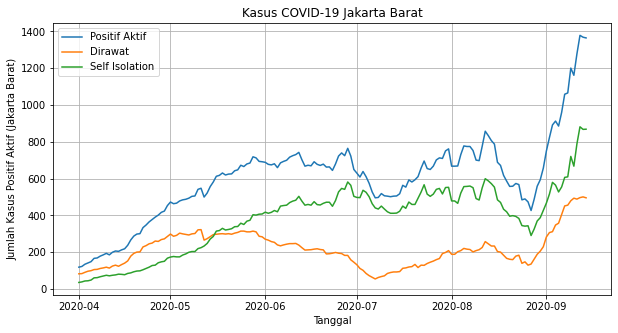

In [ ]:
values = df[['Positif Aktif', 'Dirawat', 'Self Isolation']].loc[(df['Nama Kota']=='JAKARTA BARAT')]
tanggal = df['Tanggal'].loc[(df['Nama Kota']=='JAKARTA BARAT')]
plt.figure(figsize=(10,5))
plt.title("Kasus COVID-19 Jakarta Barat")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Kasus Positif Aktif (Jakarta Barat)")
plt.plot(tanggal, values)
plt.grid()
plt.legend(values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


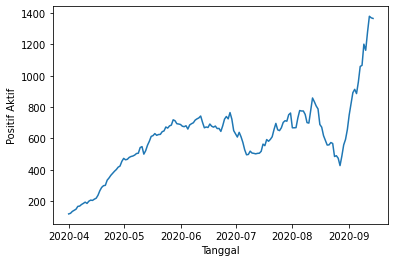

In [ ]:
sns.lineplot(df.Tanggal, df['Positif Aktif'].loc[df['Nama Kota']=='JAKARTA BARAT'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

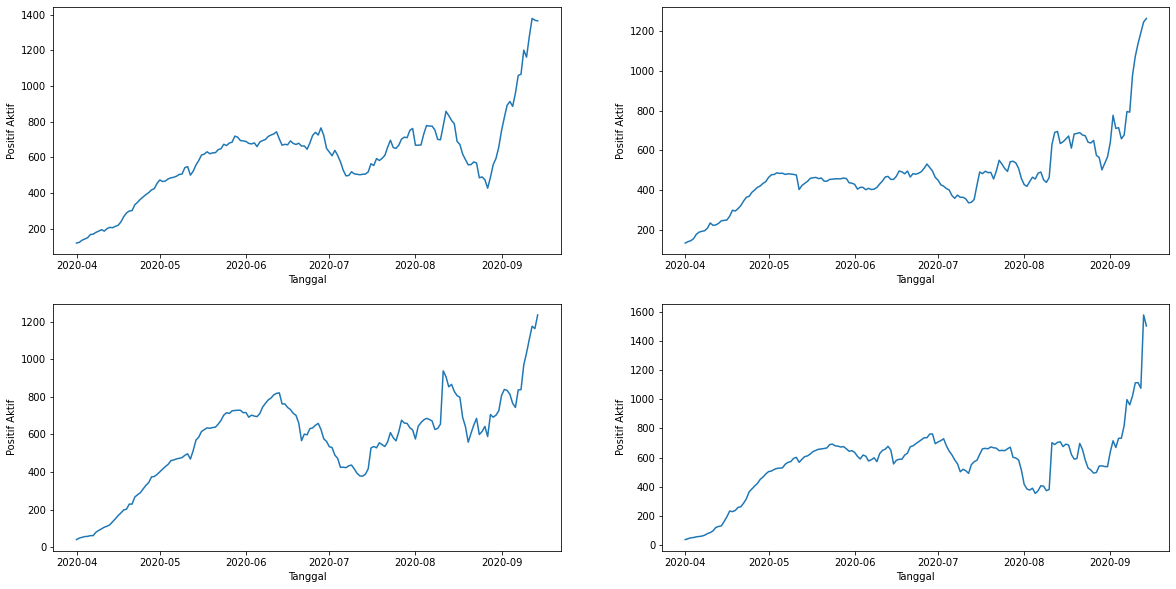

In [ ]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

sns.lineplot(df.Tanggal, df['Positif Aktif'].loc[df['Nama Kota']=='JAKARTA BARAT'], ax=ax1);
sns.lineplot(df.Tanggal, df['Positif Aktif'].loc[df['Nama Kota']=='JAKARTA SELATAN'], ax=ax2);
sns.lineplot(df.Tanggal, df['Positif Aktif'].loc[df['Nama Kota']=='JAKARTA UTARA'], ax=ax3);
sns.lineplot(df.Tanggal, df['Positif Aktif'].loc[df['Nama Kota']=='JAKARTA PUSAT'], ax=ax4);

# Oktober 2020

In [16]:
for i in range(1,32):
  df = pd.read_excel('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta per Kota/Standar Kelurahan Data Corona ('+ str(i) + ' Oktober 2020 Pukul 10.00).xlsx')
  df.drop(index=0, inplace = True)
  df.dropna(axis = 1, inplace = True)
  df.drop(df[df["Nama_provinsi"]=="LUAR DKI JAKARTA"].index,inplace = True)
  df.drop(columns = {"ID_KEL","nama_kelurahan"},inplace = True)
  df.drop(columns="nama_kecamatan",inplace=True)
  df.rename(columns={"Nama_provinsi":"Nama Provinsi",
                     "nama_kota": "Nama Kota",
                     "POSITIF":"Positif",
                     "Meninggal.1":"Meninggal"},inplace=True)
  df.drop(columns = 'Nama Provinsi',inplace = True)
  df.drop(df[df['Nama Kota']=='PROSES UPDATE DATA'].index, inplace=True)
  df.drop(df[df['Nama Kota']=='BELUM DIKETAHUI'].index, inplace=True)
  df.groupby(['Nama Kota']).sum()
  df = df[["Nama Kota","Positif","Dirawat","Sembuh","Meninggal","Self Isolation"]]

  new_df = df.groupby(['Nama Kota']).sum()
  new_df.insert(0, 'Tanggal', pd.to_datetime('2020-10-' + str(i)))
  
  new_df.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' Oktober 2020.csv')

In [17]:
for i in range(1,31):
    df1 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' Oktober 2020.csv')
    df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i+1) + ' Oktober 2020.csv')    
    df2['Positif Aktif'] = df2['Dirawat'] + df2['Self Isolation']
    df2['Positif Harian'] = df2['Positif'] - df1['Positif']
    df2['Sembuh Harian'] = df2['Sembuh'] - df1['Sembuh']
    df2.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i+1) + ' Oktober 2020.csv')

In [18]:
df1 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 1 Oktober 2020.csv')
df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 2 Oktober 2020.csv')
frames = [df1, df2]
result = pd.concat(frames)

In [19]:
result

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Meninggal.1,Self Isolation,Unnamed: 0,Positif Aktif,Positif Harian,Sembuh Harian
0,JAKARTA BARAT,2020-10-01,9938,236,7460,0,253,1989,NaN,NaN,NaN,NaN
1,JAKARTA PUSAT,2020-10-01,9013,142,7589,0,256,1026,NaN,NaN,NaN,NaN
2,JAKARTA SELATAN,2020-10-01,9233,237,6763,0,217,2016,NaN,NaN,NaN,NaN
3,JAKARTA TIMUR,2020-10-01,12076,354,9128,0,255,2339,NaN,NaN,NaN,NaN
4,JAKARTA UTARA,2020-10-01,8474,118,7025,0,198,1133,NaN,NaN,NaN,NaN
5,KAB.ADM.KEP.SERIBU,2020-10-01,77,0,66,0,0,11,NaN,NaN,NaN,NaN
0,JAKARTA BARAT,2020-10-02,10179,300,7592,0,253,2034,0.0,2334.0,241.0,132.0
1,JAKARTA PUSAT,2020-10-02,9123,175,7692,0,256,1000,1.0,1175.0,110.0,103.0
2,JAKARTA SELATAN,2020-10-02,9368,253,6867,0,217,2031,2.0,2284.0,135.0,104.0
3,JAKARTA TIMUR,2020-10-02,12231,387,9280,0,256,2308,3.0,2695.0,155.0,152.0


In [20]:
new_result = result.groupby(['Nama Kota','Tanggal']).sum()

In [21]:
for i in range(3,32):
    df1 = result
    df2 = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona ' + str(i) + ' Oktober 2020.csv')
    frames = [df1, df2]
    result = pd.concat(frames)

In [22]:
new_result = result.groupby(['Nama Kota','Tanggal']).sum()

In [23]:
new_result

Positif  Dirawat  ...  Positif Harian  Sembuh Harian
Nama Kota          Tanggal                       ...                               
JAKARTA BARAT      2020-10-01     9938      236  ...             0.0            0.0
                   2020-10-02    10179      300  ...           241.0          132.0
                   2020-10-03    10421      316  ...           242.0          159.0
                   2020-10-04    10536      336  ...           115.0          185.0
                   2020-10-05    10674      358  ...           138.0          129.0
...                                ...      ...  ...             ...            ...
KAB.ADM.KEP.SERIBU 2020-10-27       91        0  ...             0.0            0.0
                   2020-10-28       91        0  ...             0.0            2.0
                   2020-10-29       91        0  ...             0.0            0.0
                   2020-10-30       91        0  ...             0.0            0.0
                   2020-10-31       91        0  ...             0.0            0.0

[186 rows x 10 columns]

In [24]:
new_result.drop(columns=['Unnamed: 0'], inplace=True)
new_result['Meninggal'] = new_result['Meninggal'] + new_result['Meninggal.1']
new_result.drop(columns=['Meninggal.1'], inplace=True)

In [25]:
new_result

Positif  Dirawat  ...  Positif Harian  Sembuh Harian
Nama Kota          Tanggal                       ...                               
JAKARTA BARAT      2020-10-01     9938      236  ...             0.0            0.0
                   2020-10-02    10179      300  ...           241.0          132.0
                   2020-10-03    10421      316  ...           242.0          159.0
                   2020-10-04    10536      336  ...           115.0          185.0
                   2020-10-05    10674      358  ...           138.0          129.0
...                                ...      ...  ...             ...            ...
KAB.ADM.KEP.SERIBU 2020-10-27       91        0  ...             0.0            0.0
                   2020-10-28       91        0  ...             0.0            2.0
                   2020-10-29       91        0  ...             0.0            0.0
                   2020-10-30       91        0  ...             0.0            0.0
                   2020-10-31       91        0  ...             0.0            0.0

[186 rows x 8 columns]

In [26]:
new_result.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 186 entries, ('JAKARTA BARAT', '2020-10-01') to ('KAB.ADM.KEP.SERIBU', '2020-10-31')
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Positif         186 non-null    int64  
 1   Dirawat         186 non-null    int64  
 2   Sembuh          186 non-null    int64  
 3   Meninggal       186 non-null    int64  
 4   Self Isolation  186 non-null    int64  
 5   Positif Aktif   186 non-null    float64
 6   Positif Harian  186 non-null    float64
 7   Sembuh Harian   186 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 12.5+ KB


In [28]:
new_result.to_excel("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Oktober 2020.xlsx")

In [29]:
new_result.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Oktober 2020.csv')

In [30]:
df_oktober = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Oktober 2020.csv')

In [31]:
df_oktober.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nama Kota       186 non-null    object 
 1   Tanggal         186 non-null    object 
 2   Positif         186 non-null    int64  
 3   Dirawat         186 non-null    int64  
 4   Sembuh          186 non-null    int64  
 5   Meninggal       186 non-null    int64  
 6   Self Isolation  186 non-null    int64  
 7   Positif Aktif   186 non-null    float64
 8   Positif Harian  186 non-null    float64
 9   Sembuh Harian   186 non-null    float64
dtypes: float64(3), int64(5), object(2)
memory usage: 14.7+ KB


In [32]:
df_oktober["Tanggal"] = pd.to_datetime(df_oktober.Tanggal)
df_oktober.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Nama Kota       186 non-null    object        
 1   Tanggal         186 non-null    datetime64[ns]
 2   Positif         186 non-null    int64         
 3   Dirawat         186 non-null    int64         
 4   Sembuh          186 non-null    int64         
 5   Meninggal       186 non-null    int64         
 6   Self Isolation  186 non-null    int64         
 7   Positif Aktif   186 non-null    float64       
 8   Positif Harian  186 non-null    float64       
 9   Sembuh Harian   186 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 14.7+ KB


In [33]:
df_oktober.to_excel("/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Oktober 2020.xlsx", index=False)

# November 2020

In [34]:
df = pd.read_excel('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta per Kota/Standar Kelurahan Data Corona (30 November 2020 Pukul 10.00).xlsx')
df.drop(index=0, inplace = True)
df.dropna(axis = 1, inplace = True)
df.drop(df[df["Nama_provinsi"]=="LUAR DKI JAKARTA"].index,inplace = True)
df.drop(columns = {"ID_KEL","nama_kelurahan"},inplace = True)
df.drop(columns="nama_kecamatan",inplace=True)
df.rename(columns={"Nama_provinsi":"Nama Provinsi",
                   "nama_kota": "Nama Kota",
                   "POSITIF":"Positif",
                   "Meninggal.1":"Meninggal"},inplace=True)
df.drop(columns = 'Nama Provinsi',inplace = True)
df.drop(df[df['Nama Kota']=='PROSES UPDATE DATA'].index, inplace=True)
df.drop(df[df['Nama Kota']=='BELUM DIKETAHUI'].index, inplace=True)
df.groupby(['Nama Kota']).sum()
df = df[["Nama Kota","Positif","Dirawat","Sembuh","Meninggal","Self Isolation"]]

new_df = df.groupby(['Nama Kota']).sum()
new_df.insert(0, 'Tanggal', pd.to_datetime('2020-11-30'))
  
new_df.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 30 November 2020.csv')

In [35]:
df_november = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 30 November 2020.csv')

In [36]:
df_november

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Meninggal.1,Self Isolation
0,JAKARTA BARAT,2020-11-30,20677,376,18518,0,458,1325
1,JAKARTA PUSAT,2020-11-30,14320,190,12989,0,361,780
2,JAKARTA SELATAN,2020-11-30,20992,380,18433,0,379,1800
3,JAKARTA TIMUR,2020-11-30,25966,515,23181,0,513,1757
4,JAKARTA UTARA,2020-11-30,15369,165,14079,0,299,826
5,KAB.ADM.KEP.SERIBU,2020-11-30,108,0,105,0,0,3


In [37]:
df_november['Meninggal'] = df_november['Meninggal'] + df_november['Meninggal.1']
df_november.drop(columns=['Meninggal.1'], inplace=True)

In [38]:
df_november

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation
0,JAKARTA BARAT,2020-11-30,20677,376,18518,458,1325
1,JAKARTA PUSAT,2020-11-30,14320,190,12989,361,780
2,JAKARTA SELATAN,2020-11-30,20992,380,18433,379,1800
3,JAKARTA TIMUR,2020-11-30,25966,515,23181,513,1757
4,JAKARTA UTARA,2020-11-30,15369,165,14079,299,826
5,KAB.ADM.KEP.SERIBU,2020-11-30,108,0,105,0,3


In [39]:
df_november.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nama Kota       6 non-null      object
 1   Tanggal         6 non-null      object
 2   Positif         6 non-null      int64 
 3   Dirawat         6 non-null      int64 
 4   Sembuh          6 non-null      int64 
 5   Meninggal       6 non-null      int64 
 6   Self Isolation  6 non-null      int64 
dtypes: int64(5), object(2)
memory usage: 464.0+ bytes


In [40]:
df_november["Tanggal"] = pd.to_datetime(df_november.Tanggal)
df_november.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Nama Kota       6 non-null      object        
 1   Tanggal         6 non-null      datetime64[ns]
 2   Positif         6 non-null      int64         
 3   Dirawat         6 non-null      int64         
 4   Sembuh          6 non-null      int64         
 5   Meninggal       6 non-null      int64         
 6   Self Isolation  6 non-null      int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 464.0+ bytes


In [41]:
df_november.to_excel('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 30 November 2020.xlsx', index=False)

# Desember 2020

In [46]:
df = pd.read_excel('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta per Kota/Standar Kelurahan Data Corona (31 Desember 2020 Pukul 10.00).xlsx')
df.drop(index=0, inplace = True)
df.dropna(axis = 1, inplace = True)
df.drop(df[df["Nama_provinsi"]=="LUAR DKI JAKARTA"].index,inplace = True)
df.drop(columns = {"ID_KEL","nama_kelurahan"},inplace = True)
df.drop(columns="nama_kecamatan",inplace=True)
df.rename(columns={"Nama_provinsi":"Nama Provinsi",
                   "nama_kota": "Nama Kota",
                   "POSITIF":"Positif",
                   "Meninggal.1":"Meninggal"},inplace=True)
df.drop(columns = 'Nama Provinsi',inplace = True)
df.drop(df[df['Nama Kota']=='PROSES UPDATE DATA'].index, inplace=True)
df.drop(df[df['Nama Kota']=='BELUM DIKETAHUI'].index, inplace=True)
df.groupby(['Nama Kota']).sum()
df = df[["Nama Kota","Positif","Dirawat","Sembuh","Meninggal","Self Isolation"]]

new_df = df.groupby(['Nama Kota']).sum()
new_df.insert(0, 'Tanggal', pd.to_datetime('2020-12-31'))
  
new_df.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 31 Desember 2020.csv')

In [47]:
df_desember = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 31 Desember 2020.csv')

In [48]:
df_desember

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation
0,JAKARTA BARAT,2020-12-31,27782,967,25005,583,1227
1,JAKARTA PUSAT,2020-12-31,18709,519,16855,414,921
2,JAKARTA SELATAN,2020-12-31,30435,833,26972,533,2097
3,JAKARTA TIMUR,2020-12-31,38233,1107,33367,674,3085
4,JAKARTA UTARA,2020-12-31,20381,525,18272,383,1201
5,KAB.ADM.KEP.SERIBU,2020-12-31,171,4,139,1,27


In [50]:
df_desember["Tanggal"] = pd.to_datetime(df_desember.Tanggal)
df_desember.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Nama Kota       6 non-null      object        
 1   Tanggal         6 non-null      datetime64[ns]
 2   Positif         6 non-null      int64         
 3   Dirawat         6 non-null      int64         
 4   Sembuh          6 non-null      int64         
 5   Meninggal       6 non-null      int64         
 6   Self Isolation  6 non-null      int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 464.0+ bytes


In [51]:
df_desember.to_excel('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 31 Desember 2020.xlsx', index=False)

# Januari 2021

In [53]:
df = pd.read_excel('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta per Kota/Standar Kelurahan Data Corona (30 Januari 2021 Pukul 10.00).xlsx')
df.drop(index=0, inplace = True)
df.dropna(axis = 1, inplace = True)
df.drop(df[df["Nama_provinsi"]=="LUAR DKI JAKARTA"].index,inplace = True)
df.drop(columns = {"ID_KEL","nama_kelurahan"},inplace = True)
df.drop(columns="nama_kecamatan",inplace=True)
df.rename(columns={"Nama_provinsi":"Nama Provinsi",
                   "nama_kota": "Nama Kota",
                   "POSITIF":"Positif",
                   "Meninggal.1":"Meninggal"},inplace=True)
df.drop(columns = 'Nama Provinsi',inplace = True)
df.drop(df[df['Nama Kota']=='PROSES UPDATE DATA'].index, inplace=True)
df.drop(df[df['Nama Kota']=='BELUM DIKETAHUI'].index, inplace=True)
df.groupby(['Nama Kota']).sum()
df = df[["Nama Kota","Positif","Dirawat","Sembuh","Meninggal","Self Isolation"]]

new_df = df.groupby(['Nama Kota']).sum()
new_df.insert(0, 'Tanggal', pd.to_datetime('2021-01-30'))
  
new_df.to_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 30 Januari 2021.csv')

In [55]:
df_januari = pd.read_csv('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 30 Januari 2021.csv')

In [56]:
df_januari

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Meninggal.1,Self Isolation
0,JAKARTA BARAT,2021-01-30,41879,448,36872,0,777,3782
1,JAKARTA PUSAT,2021-01-30,26630,343,23459,0,502,2326
2,JAKARTA SELATAN,2021-01-30,47996,437,42180,0,754,4625
3,JAKARTA TIMUR,2021-01-30,58793,883,52368,0,959,4583
4,JAKARTA UTARA,2021-01-30,29793,291,26586,0,481,2435
5,KAB.ADM.KEP.SERIBU,2021-01-30,416,0,302,0,3,111


In [57]:
df_januari['Meninggal'] = df_januari['Meninggal'] + df_januari['Meninggal.1']
df_januari.drop(columns=['Meninggal.1'], inplace=True)

In [58]:
df_januari["Tanggal"] = pd.to_datetime(df_januari.Tanggal)
df_januari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Nama Kota       6 non-null      object        
 1   Tanggal         6 non-null      datetime64[ns]
 2   Positif         6 non-null      int64         
 3   Dirawat         6 non-null      int64         
 4   Sembuh          6 non-null      int64         
 5   Meninggal       6 non-null      int64         
 6   Self Isolation  6 non-null      int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 464.0+ bytes


In [59]:
df_januari.to_excel('/content/drive/MyDrive/finalProjectCompfest/Data Covid-19 Jakarta Formated/Standar Kelurahan Data Corona 30 Januari 2021.xlsx', index=False)

In [60]:
df_januari

,Nama Kota,Tanggal,Positif,Dirawat,Sembuh,Meninggal,Self Isolation
0,JAKARTA BARAT,2021-01-30,41879,448,36872,777,3782
1,JAKARTA PUSAT,2021-01-30,26630,343,23459,502,2326
2,JAKARTA SELATAN,2021-01-30,47996,437,42180,754,4625
3,JAKARTA TIMUR,2021-01-30,58793,883,52368,959,4583
4,JAKARTA UTARA,2021-01-30,29793,291,26586,481,2435
5,KAB.ADM.KEP.SERIBU,2021-01-30,416,0,302,3,111
